DSCI 100 Group 41 Proposal

Title: Customer Analysis of Shipment Reviews


Introduction:

- As the population increases, production of essential food like fruits have changed drastically. Additionally, there has also been a rise in the food waste produced. By understanding the factors that contribute to fruit quality, farmers and producers can optimize their current cultivation process, leading to improved yield and quality control. Understanding these factors allow production companies to maximize their profits and deliver better satisfaction to their customers.

- Our question is: Is it possible to use the measured attributes of set of apples  available to us to predict whether a future apple (with unknown quality) shows an overall ‘good’ or ‘bad’ quality?

- The dataset that will be used to answer the question is the ‘Apple Quality’ dataset, which is a robust dataset that contains 9 columns with information about the various components of a fruit including its size, weight, crunchiness, etc.


Preliminary Explanatory Data Analysis:

- Dataset is read into R

In [1]:
library(repr)
library(tidyverse)
library(tidymodels)
library(readxl)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
download.file("https://raw.githubusercontent.com/Dana-Te/DSCI-100-G41-Apples-Data-Set/main/apple_quality.csv", "apple_quality.csv")
Apple_data<- read_csv("apple_quality.csv")
Apple_data

Rows: 4001 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Acidity, Quality
dbl (7): A_id, Size, Weight, Sweetness, Crunchiness, Juiciness, Ripeness

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
0,-3.97004852,-2.5123364,5.3463296,-1.01200871,1.8449004,0.32983980,-0.491590483,good
1,-1.19521719,-2.8392565,3.6640588,1.58823231,0.8532858,0.86753008,-0.722809367,good
2,-0.29202386,-1.3512820,-1.7384292,-0.34261593,2.8386355,-0.03803333,2.621636473,bad
3,-0.65719577,-2.2716266,1.3248738,-0.09787472,3.6379705,-3.41376134,0.790723217,good
4,1.36421682,-1.2966119,-0.3846582,-0.55300577,3.0308744,-1.30384943,0.501984036,good
5,-3.42539975,-1.4090822,-1.9135112,-0.55577486,-3.8530715,1.91461592,-2.981523169,bad
6,1.33160574,1.6359557,0.8759742,-1.67779794,3.1063445,-1.84741673,2.414170509,good
7,-1.99546210,-0.4289585,1.5306436,-0.74297168,0.1588340,0.97443786,-1.470125066,good
8,-3.86763223,-3.7345136,0.9864291,-1.20765455,2.2928729,4.08092079,-4.871904758,bad


- Cleaned & wrangled data into a tidy table for use

In [57]:
Apple_data_wrangled<- Apple_data|>
    filter(A_id!="NA")|>
    select(Size:Quality)|>
    mutate(Acidity=as.character(Acidity))

Apple_data_wrangled

Apple_data_mean<- Apple_data_wrangled|>
    select(Size:Acidity)|>
    mutate(Acidity=as.numeric(Acidity))|>
    map_df(mean, na.rm=TRUE)

Apple_data_quality<-Apple_data|>
    filter(A_id!="NA")|>
    select(Quality)|>
    group_by(Quality) |> 
    summarise(Count = n())|>
    pivot_wider(names_from=Quality, values_from=Count)

Merge<- cross_join(Apple_data_mean, Apple_data_quality)
Merge

#The 'Merge' table consists of the mean for all the variables (Size to Ripeness), 
#and the number of rows in each classification from Quality( bad or good).
#The data was already tidy and needed not much wrangling.

Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
-3.97004852,-2.5123364,5.3463296,-1.01200871,1.8449004,0.32983980,-0.491590483,good
-1.19521719,-2.8392565,3.6640588,1.58823231,0.8532858,0.86753008,-0.722809367,good
-0.29202386,-1.3512820,-1.7384292,-0.34261593,2.8386355,-0.03803333,2.621636473,bad
-0.65719577,-2.2716266,1.3248738,-0.09787472,3.6379705,-3.41376134,0.790723217,good
1.36421682,-1.2966119,-0.3846582,-0.55300577,3.0308744,-1.30384943,0.501984036,good
-3.42539975,-1.4090822,-1.9135112,-0.55577486,-3.8530715,1.91461592,-2.981523169,bad
1.33160574,1.6359557,0.8759742,-1.67779794,3.1063445,-1.84741673,2.414170509,good
-1.99546210,-0.4289585,1.5306436,-0.74297168,0.1588340,0.97443786,-1.470125066,good
-3.86763223,-3.7345136,0.9864291,-1.20765455,2.2928729,4.08092079,-4.871904758,bad


Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,bad,good
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
-0.5030146,-0.9895465,-0.4704785,0.9854779,0.512118,0.4982774,0.0768773,1996,2004


- Visualization relevent to data analysis

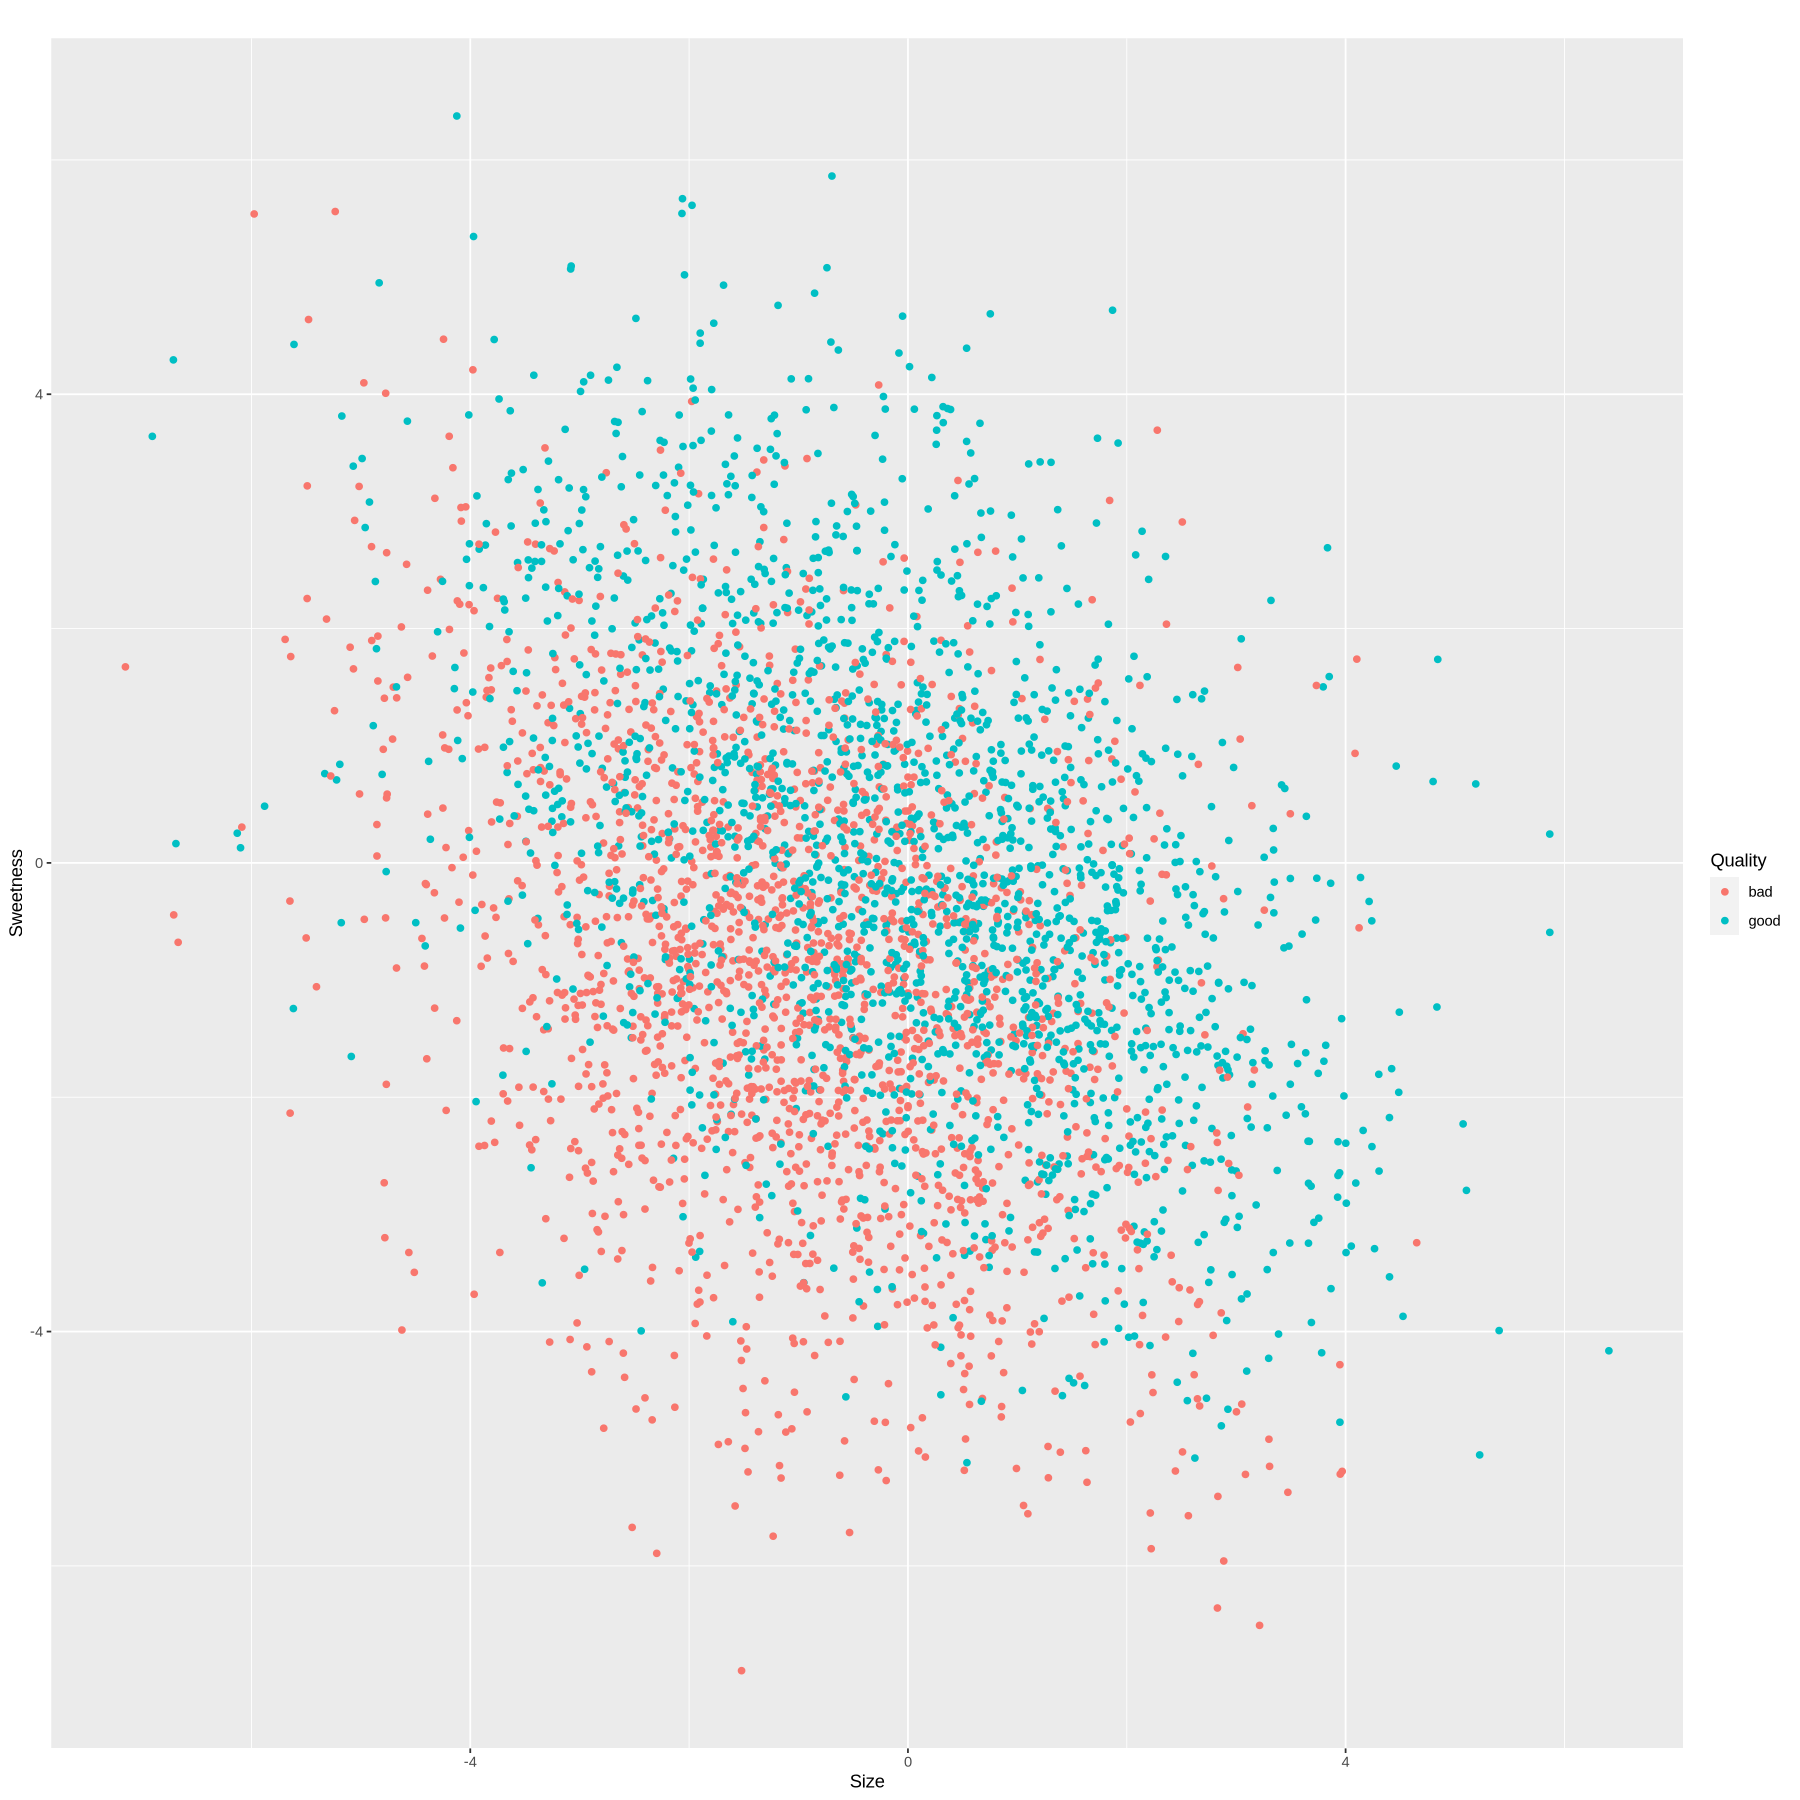

In [58]:
options(repr.plot.width = 15, repr.plot.height = 15)
Apple_plot<-Apple_data_wrangled|>
    ggplot(aes(x=Size, y=Sweetness, color= Quality)) + 
        geom_point() + 
        labs(fill = "")+
             ggtitle("")
Apple_plot

Methods:

- To conduct our data analysis for our prediction, we will first separate our apple data into training data (75%) and testing data (25%), then apply the K-nearest neighbors classification algorithm in R using tidymodels. (will expand more on this tmr)
For predictors variables, we will use all the columns except for ‘ID’ and ‘Quality’ to find correlation and to choose variables that will inform our answer.  Thus, ‘Quality’ will be the class we will be using  to  directly compare the production methods of ‘good or bad’ harvest. For our exploratory data analysis, we used the columns ‘Sweetness’ and ‘Size’ to determine the optimal conditions for a better batch of apples
.t- s
One way that we will use to visualize the results is by first generating a grid of synthetic new observations using the expand.grid function, then predict the label of each of these points,  and finally visualize the predictions with a colored  scatterplot, separating the colors based on ‘good’ or ‘bad’ quality, thus to inform the overall decision of our trained classifier. 


Expected outcomes and significance:

What do you expect to find?
- We expect to produce a clear visualization of the current shipment patterns and relate them with customer feedback. Thus, we hope to find a clear answer to our question and help businesses improve their shipping capabilities. 

What impact could such findings have?
- By analyzing shipping methods, we hope to identify patterns and trends in shipping data to improve  efficiency and help businesses set accurate expectations for customers. In businesses, reliability and timely shipping is a key factor in customer satisfaction so identifying the most efficient method to meet delivery timelines will be essential in increasing profits and developing overall operations.

What future questions could this lead to?
- Some further questions with this project are connecting the findings with other technologies to better shipments like: What are new alternative shipping methods that offer a better cost-to-performance ratio? What are the best shipping routes in terms of cost and time efficiency? 
Or we could even delve into the effects of these shipping methods by connecting it to their fuel emissions and climate change with what is the most environmentally friendly method of shipping packages that will not sacrifice cost and time?

- Cleaned & wrangled data into a tidy format

-Using only training data, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data. 

-Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis.

Methods:

Explain how you will conduct either your data analysis and which variables/columns you will use. Note - you do not need to use all variables/columns that exist in the raw data set. In fact, that's often not a good idea. For each variable think: is this a useful variable for prediction?

- Since we care about the shipping methods, the variables/columns we will be using are ‘Mode of Shipment’ and ‘Reached on Time’ to try to directly compare the shipping methods of ‘Flight, Ship and Road’, and further use ‘Customer Care Calls’ and ‘Customer Rating’ as a guideline for the levels of customer satisfaction (an indication of customer experience). For this specific data analysis, we would like to use the columns ‘Weight in Grams’ and ‘Product Cost’ to determine the optimal method of shipping based on the specifications of the package being sent. 

Describe at least one way that you will visualize the results
- To visualize our results, we would like to use a scatterplot where weight and price are the axis while each point will be classified depending on the mode of transportation used.

Expected outcomes and significance:

What do you expect to find?
- We expect to produce a clear visualization of the current shipment patterns and relate them with customer feedback. Thus, we hope to find a clear answer to our question and help businesses improve their shipping capabilities. 

What impact could such findings have?
- By analyzing shipping methods, we hope to identify patterns and trends in shipping data to improve  efficiency and help businesses set accurate expectations for customers. In businesses, reliability and timely shipping is a key factor in customer satisfaction so identifying the most efficient method to meet delivery timelines will be essential in increasing profits and developing overall operations.

What future questions could this lead to?
- Some further questions with this project are connecting the findings with other technologies to better shipments like: What are new alternative shipping methods that offer a better cost-to-performance ratio? What are the best shipping routes in terms of cost and time efficiency? 
Or we could even delve into the effects of these shipping methods by connecting it to their fuel emissions and climate change with what is the most environmentally friendly method of shipping packages that will not sacrifice cost and time?